In [3]:
import numpy as np
from scipy.spatial.distance import cdist

r1 = np.load("../data_cache/10000/ion_pos/100us.npy")
r2 = np.load("../data_cache/10000/ion_pos/110us.npy")

def get_mean_cdist(r1, r2):
    dist_martrix = cdist(r1, r2, metric="euclidean")
    dist = np.min(dist_martrix, axis=0) # Find the minimum of each col
    return np.mean(dist)
print(get_mean_cdist(r1, r2))

1.017456818709952


In [28]:
r3 = np.load("../data_cache/10000/ion_pos/120us.npy")
print(get_mean_cdist(r2, r3))
print(get_mean_cdist(r1, r3))

1.2211783789099808
0.9922163204654866


In [29]:
r4 = np.load("../data_cache/10000/ion_pos/130us.npy")
print(get_mean_cdist(r3, r4))
print(get_mean_cdist(r2, r4))
print(get_mean_cdist(r1, r4))

0.9554194032828557
1.1639574307398117
0.9826357859839034


min_dist: 0.025432629195058704
max_dist: 3.171963292102542


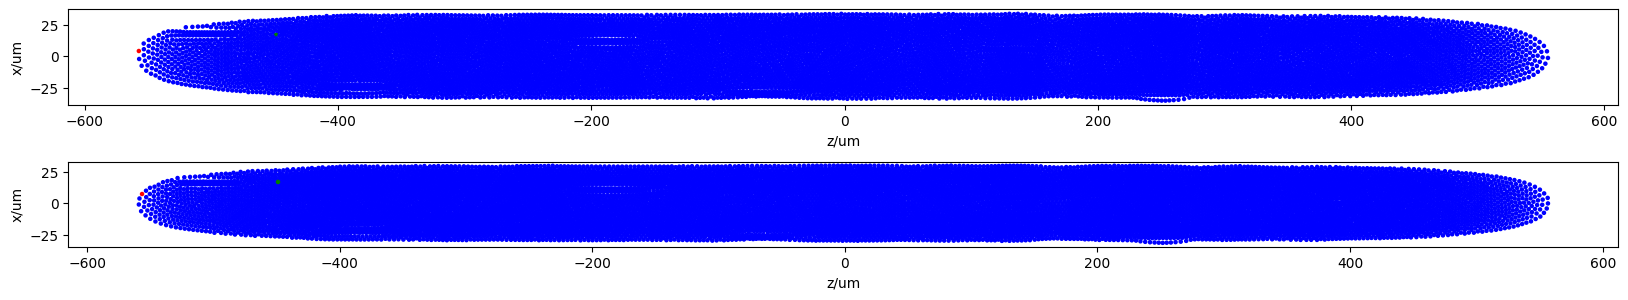

In [8]:
# plot crystal

import matplotlib.pyplot as plt


N = 10000
r1 = np.load("../data_cache/%d/ion_pos/100us.npy"%N)
r2 = np.load("../data_cache/%d/ion_pos/110us.npy"%N)
dist_martix = cdist(r1, r2)
dist = np.min(dist_martix, axis=0)  # Find the minimum of each col
min2, max2 = np.argmin(dist), np.argmax(dist)
print("min_dist:", np.min(dist))
print("max_dist:", np.max(dist))
min1 = np.argmin(dist_martix[:, min2])
max1 = np.argmin(dist_martix[:, max2])

fig, ax = plt.subplots(2,1,figsize=(20,3.5))
colors1 = ['b']*N
colors2 = ['b']*N
colors1[min1] = 'g'
colors2[min2] = 'g'
colors1[max1] = 'r'
colors2[max2] = 'r'
ax[0].scatter(r1[:, 2], r1[:, 0], s=5, c=colors1)
ax[1].scatter(r2[:, 2], r2[:, 0], s=5, c=colors2)

for i in range(2):
    ax[i].set_xlabel("z/um")
    ax[i].set_ylabel("x/um")
    ax[i].set_aspect("equal")
plt.show()
    

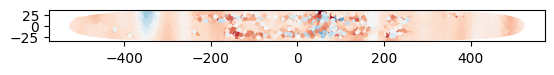

In [16]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
fig, ax = plt.subplots()
r = np.load(("../data_cache/%d/status/r/flat_28_45.085us.npy"%N))
# 归一化 y 值到 [0, 1]
norm = Normalize(vmin=np.min(r[:, 1]), vmax=np.max(r[:, 1]))

# 使用颜色映射（'RdBu'：小值蓝，大值红）
cmap = cm.RdBu
colors = cmap(norm(r[:, 1]))  # 转换为 RGBA 颜色数组
ax.scatter(r[:,2], r[:, 0], s=5, c=colors)
ax.set_aspect("equal")
plt.show()

In [23]:
import numpy as np
t_ls = np.arange(100, 200, 10)
Nt = t_ls.shape[0]
dist_correlation_10 = np.zeros((Nt, Nt))
for i in range(Nt):
    for j in range(Nt):
        ri = np.load("../data_cache/10000/ion_pos/%dus.npy"%t_ls[i])
        rj = np.load("../data_cache/10000/ion_pos/%dus.npy"%t_ls[j])
        dist_correlation_10[i][j] = get_mean_cdist(ri, rj)
print(dist_correlation_10)
print(np.min(dist_correlation_10[np.where(dist_correlation_10>0)]), np.max(dist_correlation_10))

[[0.         1.01745682 0.99221632 0.98263579 0.99926716 1.01381198
  0.96256088 1.01057555 0.99871001 0.99151849]
 [1.1439314  0.         1.22117838 1.16395743 1.19641807 1.08588379
  1.12066675 1.08829603 1.19621515 0.8960379 ]
 [0.98701473 1.05688507 0.         0.9554194  0.96077942 0.99190917
  0.99698591 1.05271751 1.00647208 1.02508721]
 [0.97642752 1.00371462 0.95545271 0.         0.84671858 1.16031593
  0.98543012 0.96267194 0.87931421 1.04079591]
 [0.99059869 1.01952729 0.9600836  0.84665656 0.         0.93490353
  1.00199131 1.17050225 1.08422451 1.04094008]
 [1.01552041 1.01581036 1.00752996 1.18163286 0.94358255 0.
  1.00244177 0.81436454 1.12223772 1.03193498]
 [0.95558802 0.9984111  0.99706944 0.98597834 1.00321341 0.99948364
  0.         0.95376714 0.97690896 0.98606202]
 [1.00559009 0.98999538 1.05680696 0.96696062 1.18007084 0.8143129
  0.95458698 0.         0.52170737 0.96282513]
 [0.9872603  1.03503773 1.00401526 0.877742   1.08459004 1.11033812
  0.97568623 0.521504

In [25]:
import numpy as np
t_ls = np.arange(100, 1100, 100)
Nt = t_ls.shape[0]
dist_correlation_100 = np.zeros((Nt, Nt))
for i in range(Nt):
    for j in range(Nt):
        ri = np.load("../data_cache/10000/ion_pos/%dus.npy"%t_ls[i])
        rj = np.load("../data_cache/10000/ion_pos/%dus.npy"%t_ls[j])
        dist_correlation_100[i][j] = get_mean_cdist(ri, rj)
print(dist_correlation_100)
print(np.min(dist_correlation_100[np.where(dist_correlation_100>0)]), np.max(dist_correlation_100))

[[0.         0.99738239 0.99378536 0.98943146 1.00760053 1.00818668
  1.008254   0.99940713 1.00246951 1.02272771]
 [1.12333652 0.         1.17880538 1.16233159 0.90124085 0.89933552
  1.21890644 1.12930712 0.91422724 1.08120062]
 [0.98183339 1.02693892 0.         0.22689949 1.01039352 1.01000159
  0.47827774 0.58709682 1.00654722 0.75503985]
 [0.97827072 1.01869454 0.22686206 0.         1.00882277 1.01131113
  0.43007274 0.49898606 1.00899825 0.67860074]
 [1.12806423 0.90032103 1.15345222 1.14351944 0.         0.19188721
  1.18129213 1.08260415 0.41727251 1.05238054]
 [1.13021702 0.89796053 1.15573709 1.14834609 0.1919122  0.
  1.1929337  1.08478931 0.36380198 1.05584015]
 [0.99513722 1.05200345 0.47803241 0.42952303 1.02216747 1.03130722
  0.         0.44520342 1.02450526 0.71736591]
 [0.9898385  1.01734519 0.58724294 0.49904316 0.97815628 0.97944156
  0.44552399 0.         0.97716644 0.37725198]
 [1.10275019 0.91233187 1.13063823 1.12481489 0.41677101 0.3636124
  1.16069916 1.059198